In [209]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [214]:
data1 = pd.read_csv('Avandia.csv')

In [215]:
data1.head()

,effectiveness_ratings,consumer,date,usage_ratings,name,gender,age_range,condition,comment,duration,satisfaction_ratings
0,5,Patient,4/30/2010,5,NaN,Female,55-64,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Avandia caused me to gain 18 lbs. in 4 mos. Wa...,2 to less than 5 years,4
1,3,Patient,4/24/2010,5,NaN,Female,55-64,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Avandia caused me to gain 18 lbs. in 4 mos. Wa...,1 to 6 months,1
2,5,Patient,4/21/2010,5,NaN,Female,65-74,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL...",5 to less than 10 years,5
3,4,Patient,3/10/2010,5,NaN,Female,45-54,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL...",2 to less than 5 years,5
4,1,Patient,3/4/2010,1,NaN,Female,55-64,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,This has been the only medication in combinati...,2 to less than 5 years,1


In [206]:
def dur(text):
    new_duration = ''.join(re.findall('[0-9]+',text))
    if new_duration == '1':
        return .1
    elif new_duration == '16':
        return .3
    elif new_duration == '61':
        return 0.75
    elif new_duration == '12':
        return 1.5
    elif new_duration == '25':
        return 3.5
    elif new_duration == '510':
        return 7.5
    else:
        return ''

In [213]:
dur(' months to less than 1 year')

0.1

In [276]:
data1['ave_duration'] = [dur(x) for x in data1['duration']]

In [277]:
data1.head()

,date,age_range,gender,condition,consumer,duration,average_duration,usage_ratings,satisfaction_ratings,effectiveness_ratings,comment,ave_duration
0,4/30/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,5,4,5,Avandia caused me to gain 18 lbs. in 4 mos. Wa...,3.5
1,4/24/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,1 to 6 months,0.3,5,1,3,Avandia caused me to gain 18 lbs. in 4 mos. Wa...,0.3
2,4/21/2010,65-74,Female,Type 2 Diabetes Mellitus,Patient,5 to less than 10 years,7.5,5,5,5,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL...",7.5
3,3/10/2010,45-54,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,5,5,4,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL...",3.5
4,3/4/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,1,1,1,This has been the only medication in combinati...,3.5


In [278]:
data1['condition'] = data1['condition'].apply(lambda x: str(x)[-24:])

In [279]:
type(data1['ave_duration'][0])

float

In [198]:
data1['adjusted_duration'][0] * 2

7.0

In [224]:
data1['age_range'].astype('category', categories=['5-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84'], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


0     55-64
1     55-64
2     65-74
3     45-54
4     55-64
5     55-64
6     45-54
7     25-34
8     55-64
9     55-64
10    55-64
11    65-74
12    35-44
13    55-64
14    45-54
15    65-74
16    65-74
17    65-74
18    65-74
19    65-74
20    65-74
21    55-64
22    55-64
23      NaN
24    55-64
25    65-74
26    55-64
27    45-54
28      NaN
29    35-44
      ...  
63    45-54
64    55-64
65    55-64
66    65-74
67    45-54
68    45-54
69    55-64
70    45-54
71    55-64
72    55-64
73    55-64
74    55-64
75    55-64
76    65-74
77      NaN
78    65-74
79    55-64
80    65-74
81    55-64
82    65-74
83    55-64
84    25-34
85    55-64
86    35-44
87    35-44
88    55-64
89    55-64
90    65-74
91    55-64
92    65-74
Name: age_range, Length: 93, dtype: category
Categories (8, object): [5-14 < 15-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65-74 < 75-84]

In [280]:
data1['average_duration']=data1['ave_duration'].astype('category', categories=[0.1,0.3,0.75,1.5,3.5,7.5], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [220]:
data1.sample()

,effectiveness_ratings,consumer,date,usage_ratings,name,gender,age_range,condition,comment,duration,satisfaction_ratings,adjusted_duration
47,4,Patient,1/13/2008,5,NaN,Male,65-74,Type 2 Diabetes Mellitus,4 mg Avandia used once per day with Glipizide ...,2 to less than 5 years,5,3.5


In [108]:
data1.describe()

,usage_ratings,satisfaction_ratings,effectiveness_ratings
count,193.000000,193.000000,193.000000
mean,4.518135,3.502591,3.834197
std,0.946998,1.639755,1.393239
min,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000
50%,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


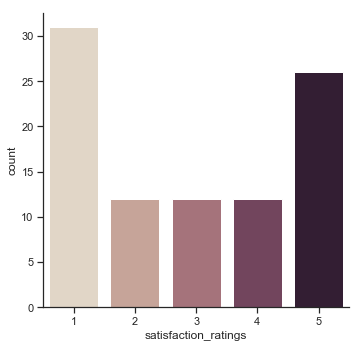

In [221]:
av = sns.catplot(x="satisfaction_ratings", kind="count", palette="ch:.25", data=data1)

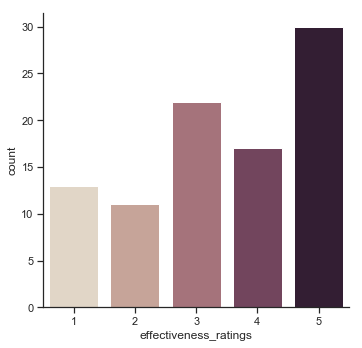

In [222]:
sns.catplot(x="effectiveness_ratings", kind="count", palette="ch:.25", data=data1)


In [241]:
data1 = data1[['date', 'age_range', 'gender', 'condition', 'consumer', 'duration', 'average_duration', 'usage_ratings', 'satisfaction_ratings', 'effectiveness_ratings', 'comment']]

In [242]:
data1.head()

,date,age_range,gender,condition,consumer,duration,average_duration,usage_ratings,satisfaction_ratings,effectiveness_ratings,comment
0,4/30/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,5,4,5,Avandia caused me to gain 18 lbs. in 4 mos. Wa...
1,4/24/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,1 to 6 months,0.3,5,1,3,Avandia caused me to gain 18 lbs. in 4 mos. Wa...
2,4/21/2010,65-74,Female,Type 2 Diabetes Mellitus,Patient,5 to less than 10 years,7.5,5,5,5,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL..."
3,3/10/2010,45-54,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,5,5,4,"NO PROBLEMS FOR 8 YRS., NOW HAVE IRREGULAR PUL..."
4,3/4/2010,55-64,Female,Type 2 Diabetes Mellitus,Patient,2 to less than 5 years,3.5,1,1,1,This has been the only medication in combinati...


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


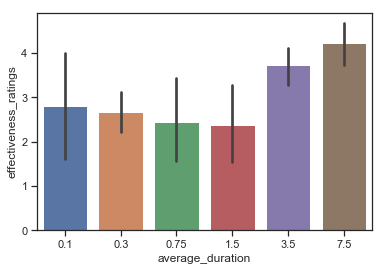

In [281]:

sns.barplot(x="average_duration", y="effectiveness_ratings",data=data1, orient='v')



/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


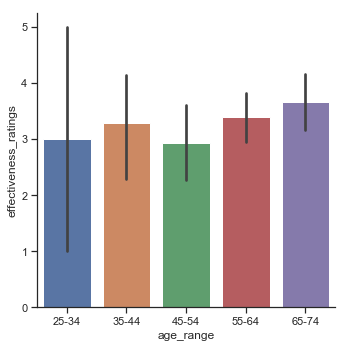

In [246]:
sns.catplot(x="age_range", y="effectiveness_ratings", kind='bar', data=data1.sort_values('age_range'));


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


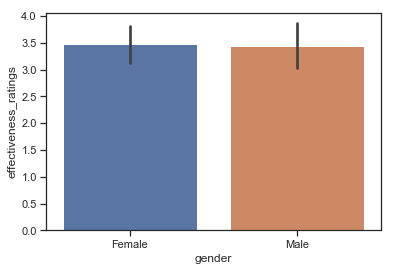

In [268]:
sns.barplot(x="gender", y="effectiveness_ratings",data=data1, orient='v')


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


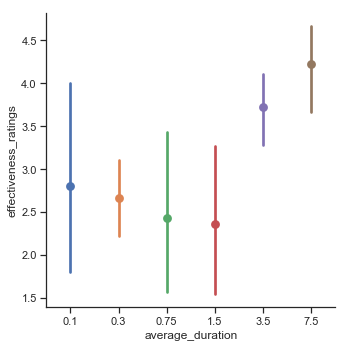

In [287]:
#data1.plot.scatter('ave_duration', 'effectiveness_ratings')
#type(data1['ave_duration'])
sns.catplot(x="average_duration", y="effectiveness_ratings", hue="average_duration", kind="point", data=data1);
